<a href="https://colab.research.google.com/github/krishnaprasadb62/NLP-porject/blob/main/nlp_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**import required libraries**

In [1]:
import pandas as pd
from nltk.stem import SnowballStemmer
from nltk import TweetTokenizer
from nltk.corpus import stopwords
from nltk.corpus import stopwords
import nltk
from sklearn.feature_extraction.text import TfidfVectorizer
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report,ConfusionMatrixDisplay
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from xgboost import XGBClassifier

**Load the dataset**

In [2]:

df1=pd.read_csv('/content/drive/MyDrive/Datasets/SMS_test.csv',encoding='ISO-8859-1')
df2=pd.read_csv('/content/drive/MyDrive/Datasets/SMS_train.csv',encoding='ISO-8859-1')
df=pd.concat([df1,df2],ignore_index=True)
df

,S. No.,Message_body,Label
0,1,"UpgrdCentre Orange customer, you may now claim...",Spam
1,2,"Loan for any purpose £500 - £75,000. Homeowner...",Spam
2,3,Congrats! Nokia 3650 video camera phone is you...,Spam
3,4,URGENT! Your Mobile number has been awarded wi...,Spam
4,5,Someone has contacted our dating service and e...,Spam
...,...,...,...
1077,953,hows my favourite person today? r u workin har...,Non-Spam
1078,954,How much you got for cleaning,Non-Spam
1079,955,Sorry da. I gone mad so many pending works wha...,Non-Spam
1080,956,Wat time ü finish?,Non-Spam


**check missing value and data types**

In [3]:
df.isna().sum()

S. No.          0
Message_body    0
Label           0
dtype: int64

In [4]:
df.dtypes

S. No.           int64
Message_body    object
Label           object
dtype: object

**Drop the unwanted columns**

In [5]:
df.drop(['S. No.'],axis=1,inplace=True)
df

,Message_body,Label
0,"UpgrdCentre Orange customer, you may now claim...",Spam
1,"Loan for any purpose £500 - £75,000. Homeowner...",Spam
2,Congrats! Nokia 3650 video camera phone is you...,Spam
3,URGENT! Your Mobile number has been awarded wi...,Spam
4,Someone has contacted our dating service and e...,Spam
...,...,...
1077,hows my favourite person today? r u workin har...,Non-Spam
1078,How much you got for cleaning,Non-Spam
1079,Sorry da. I gone mad so many pending works wha...,Non-Spam
1080,Wat time ü finish?,Non-Spam


**NLP technique:remove special charachters**

In [6]:
sms=df.Message_body
sms=sms.str.replace("[^a-zA-Z0-9 ]+","")
sms

<ipython-input-6-14ade1e2ef71>:2: FutureWarning: The default value of regex will change from True to False in a future version.
  sms=sms.str.replace("[^a-zA-Z0-9 ]+","")


0       UpgrdCentre Orange customer you may now claim ...
1       Loan for any purpose 500  75000 Homeowners  Te...
2       Congrats Nokia 3650 video camera phone is your...
3       URGENT Your Mobile number has been awarded wit...
4       Someone has contacted our dating service and e...
                              ...                        
1077    hows my favourite person today r u workin hard...
1078                        How much you got for cleaning
1079    Sorry da I gone mad so many pending works what...
1080                                     Wat time  finish
1081                       Just glad to be talking to you
Name: Message_body, Length: 1082, dtype: object

**NLP technique:split the objects and identify the root word from objects**

In [7]:
sbs=SnowballStemmer('english')
tk=TweetTokenizer()
sms=sms.apply(lambda line:[sbs.stem(token.lower()) for token in tk.tokenize(line)]).apply(lambda token:" ".join(token))
sms

0       upgrdcentr orang custom you may now claim your...
1       loan for ani purpos 500  7500 0 homeown tenant...
2       congrat nokia 3650 video camera phone is your ...
3       urgent your mobil number has been award with a...
4       someon has contact our date servic and enter y...
                              ...                        
1077    how my favourit person today r u workin hard c...
1078                           how much you got for clean
1079     sorri da i gone mad so mani pend work what to do
1080                                      wat time finish
1081                          just glad to be talk to you
Name: Message_body, Length: 1082, dtype: object

**NLP technique:Find the stop word and remove from dataset**

In [8]:
nltk.download('stopwords')
sw=stopwords.words('english')
print(sw)

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [9]:
sms=sms.apply(lambda line:[token for token in tk.tokenize(line) if token not in sw]).apply(lambda token:" ".join(token))
sms=sms.apply(lambda line:[token for token in tk.tokenize(line) if len(token)>2]).apply(lambda token:" ".join(token))
sms

0       upgrdcentr orang custom may claim free camera ...
1       loan ani purpos 500  7500 homeown tenant welco...
2       congrat nokia 3650 video camera phone call 090...
3       urgent mobil number award 2000 prize guarante ...
4       someon contact date servic enter phone becaus ...
                              ...                        
1077    favourit person today workin hard couldnt slee...
1078                                       much got clean
1079                        sorri gone mad mani pend work
1080                                      wat time finish
1081                                            glad talk
Name: Message_body, Length: 1082, dtype: object

**NLP Technique:coverted to numeric values**

In [10]:
vectorizer=TfidfVectorizer()
vectors=vectorizer.fit_transform(sms)
print(vectors)

  (0, 538)	0.2311081280581299
  (0, 1974)	0.2311081280581299
  (0, 489)	0.19569194028222273
  (0, 2624)	0.21691277864755
  (0, 1533)	0.2553752381601956
  (0, 193)	0.2553752381601956
  (0, 1037)	0.18724884717104773
  (0, 1942)	0.20271742923697
  (0, 383)	0.2553752381601956
  (0, 154)	0.2553752381601956
  (0, 1)	0.2553752381601956
  (0, 691)	0.10638606951424792
  (0, 1689)	0.2411798887496156
  (0, 2799)	0.2411798887496156
  (0, 2040)	0.15722948076957707
  (0, 697)	0.18724884717104773
  (0, 1185)	0.13459103824782215
  (0, 783)	0.1551694725454022
  (0, 1747)	0.19902875343248438
  (0, 879)	0.16837855844341862
  (0, 1976)	0.20684101795606424
  (0, 2800)	0.2553752381601956
  (1, 552)	0.16440415641082057
  (1, 2648)	0.1522455294942074
  (1, 165)	0.26702848850254
  :	:
  (1077, 2184)	0.32932994464762355
  (1077, 851)	0.32932994464762355
  (1077, 1119)	0.32932994464762355
  (1077, 2955)	0.31102373113483417
  (1077, 1870)	0.31102373113483417
  (1077, 1326)	0.2980352659456196
  (1077, 1898)	0.2614

In [11]:
df['Label']=df['Label'].map({'Non-Spam':0,'Spam':1})
df

,Message_body,Label
0,"UpgrdCentre Orange customer, you may now claim...",1
1,"Loan for any purpose £500 - £75,000. Homeowner...",1
2,Congrats! Nokia 3650 video camera phone is you...,1
3,URGENT! Your Mobile number has been awarded wi...,1
4,Someone has contacted our dating service and e...,1
...,...,...
1077,hows my favourite person today? r u workin har...,0
1078,How much you got for cleaning,0
1079,Sorry da. I gone mad so many pending works wha...,0
1080,Wat time ü finish?,0


**Take input variable output variable**

In [12]:
X=vectors
print(X)

  (0, 538)	0.2311081280581299
  (0, 1974)	0.2311081280581299
  (0, 489)	0.19569194028222273
  (0, 2624)	0.21691277864755
  (0, 1533)	0.2553752381601956
  (0, 193)	0.2553752381601956
  (0, 1037)	0.18724884717104773
  (0, 1942)	0.20271742923697
  (0, 383)	0.2553752381601956
  (0, 154)	0.2553752381601956
  (0, 1)	0.2553752381601956
  (0, 691)	0.10638606951424792
  (0, 1689)	0.2411798887496156
  (0, 2799)	0.2411798887496156
  (0, 2040)	0.15722948076957707
  (0, 697)	0.18724884717104773
  (0, 1185)	0.13459103824782215
  (0, 783)	0.1551694725454022
  (0, 1747)	0.19902875343248438
  (0, 879)	0.16837855844341862
  (0, 1976)	0.20684101795606424
  (0, 2800)	0.2553752381601956
  (1, 552)	0.16440415641082057
  (1, 2648)	0.1522455294942074
  (1, 165)	0.26702848850254
  :	:
  (1077, 2184)	0.32932994464762355
  (1077, 851)	0.32932994464762355
  (1077, 1119)	0.32932994464762355
  (1077, 2955)	0.31102373113483417
  (1077, 1870)	0.31102373113483417
  (1077, 1326)	0.2980352659456196
  (1077, 1898)	0.2614

In [13]:
y=df['Label']
y

0       1
1       1
2       1
3       1
4       1
       ..
1077    0
1078    0
1079    0
1080    0
1081    0
Name: Label, Length: 1082, dtype: int64

**split the dataset into training and testing**

In [14]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=1)
print(X_train.shape,y_train.shape)
print(X_test.shape,y_test.shape)

(757, 3044) (757,)
(325, 3044) (325,)


model creation:KNN

In [15]:
knn1=KNeighborsClassifier(n_neighbors=3)
knn1.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=3)

In [16]:
y_pred_knn1=knn1.predict(X_test)
y_pred_knn1

array([0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

performanace measure of KNN

              precision    recall  f1-score   support

           0       0.87      1.00      0.93       273
           1       1.00      0.23      0.38        52

    accuracy                           0.88       325
   macro avg       0.94      0.62      0.65       325
weighted avg       0.89      0.88      0.84       325



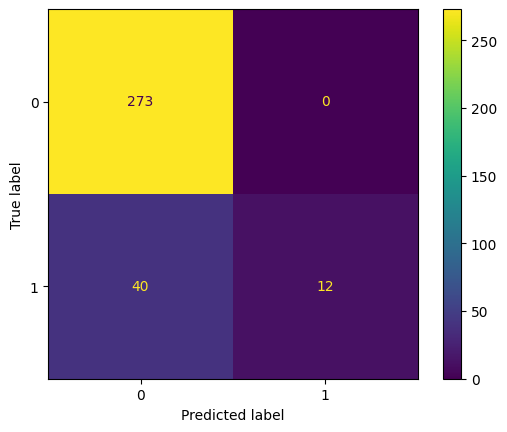

In [17]:
print(classification_report(y_test,y_pred_knn1))
print(ConfusionMatrixDisplay.from_predictions(y_test,y_pred_knn1))

model creation:SVC

In [18]:
sv1=SVC()
sv1.fit(X_train,y_train)

SVC()

In [19]:
y_pred_sv1=sv1.predict(X_test)
y_pred_sv1

array([0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

performance measure of SVC

              precision    recall  f1-score   support

           0       0.94      1.00      0.97       273
           1       1.00      0.65      0.79        52

    accuracy                           0.94       325
   macro avg       0.97      0.83      0.88       325
weighted avg       0.95      0.94      0.94       325



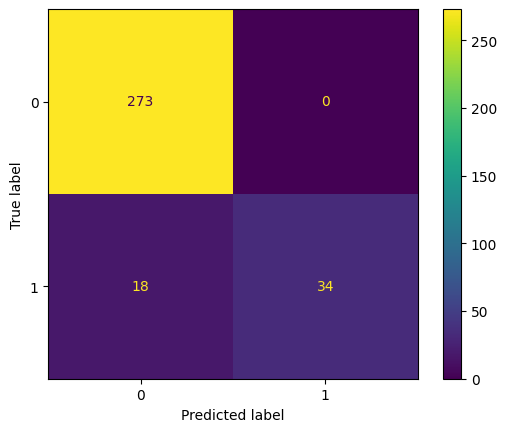

In [20]:
print(classification_report(y_test,y_pred_sv1))
print(ConfusionMatrixDisplay.from_predictions(y_test,y_pred_sv1))

model creation:naive_bayes

In [21]:
mb=MultinomialNB()
mb.fit(X_train,y_train)

MultinomialNB()

In [22]:
y_pred_mb=mb.predict(X_test)
y_pred_mb

array([0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

**performance measure of naive_bayes**

              precision    recall  f1-score   support

           0       0.93      1.00      0.96       273
           1       1.00      0.58      0.73        52

    accuracy                           0.93       325
   macro avg       0.96      0.79      0.85       325
weighted avg       0.94      0.93      0.92       325



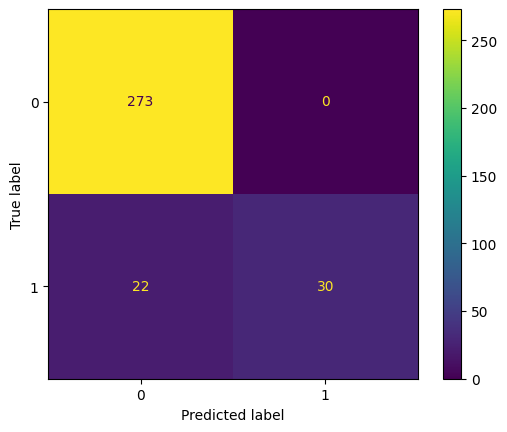

In [23]:
print(classification_report(y_test,y_pred_mb))
print(ConfusionMatrixDisplay.from_predictions(y_test,y_pred_mb))

**model creation: DecisionTresClassifier**


In [24]:
dtc1=DecisionTreeClassifier()
dtc1.fit(X_train,y_train)

DecisionTreeClassifier()

In [25]:
y_pred_dtc1=dtc1.predict(X_test)
y_pred_dtc1

array([0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

**performance measure of DecisionTreeClassifier**

              precision    recall  f1-score   support

           0       0.95      0.96      0.95       273
           1       0.76      0.71      0.73        52

    accuracy                           0.92       325
   macro avg       0.85      0.83      0.84       325
weighted avg       0.92      0.92      0.92       325



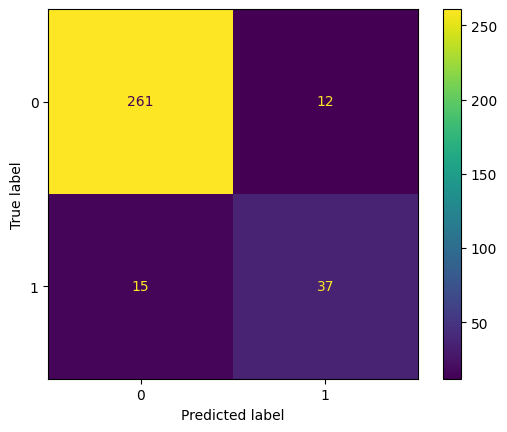

In [26]:
print(classification_report(y_test,y_pred_dtc1))
print(ConfusionMatrixDisplay.from_predictions(y_test,y_pred_dtc1))

**model creation:RandomForestClassifier**

In [27]:
rfc1=RandomForestClassifier()
rfc1.fit(X_train,y_train)

RandomForestClassifier()

In [28]:
y_pred_rfc1=rfc1.predict(X_test)
y_pred_rfc1

array([0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

**performance measure of Randomforestclassifier**

              precision    recall  f1-score   support

           0       0.94      1.00      0.97       273
           1       1.00      0.69      0.82        52

    accuracy                           0.95       325
   macro avg       0.97      0.85      0.89       325
weighted avg       0.95      0.95      0.95       325



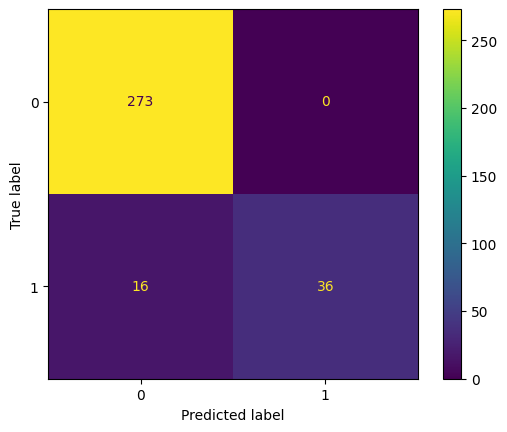

In [29]:
print(classification_report(y_test,y_pred_rfc1))
print(ConfusionMatrixDisplay.from_predictions(y_test,y_pred_rfc1))

model creation:AdaBoostClassifier

In [30]:
abc1=AdaBoostClassifier()
abc1.fit(X_train,y_train)

AdaBoostClassifier()

In [31]:
y_pred_abc1=abc1.predict(X_test)
y_pred_abc1

array([0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0,
       0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

performance measure of AdaBoostClassifier

              precision    recall  f1-score   support

           0       0.96      0.98      0.97       273
           1       0.87      0.77      0.82        52

    accuracy                           0.94       325
   macro avg       0.91      0.87      0.89       325
weighted avg       0.94      0.94      0.94       325



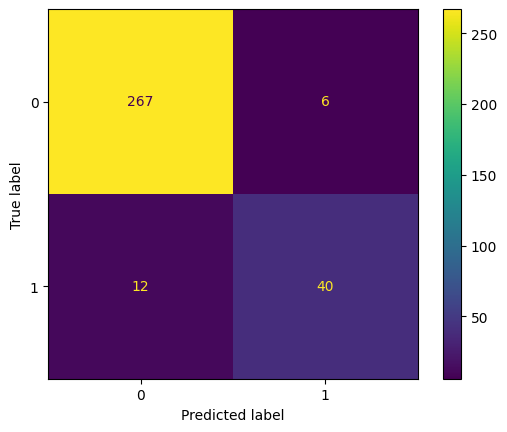

In [32]:
print(classification_report(y_test,y_pred_abc1))
print(ConfusionMatrixDisplay.from_predictions(y_test,y_pred_abc1))

model creation:XGBClassifier

In [33]:
xg1=XGBClassifier()
xg1.fit(X_train,y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [34]:
y_pred_xg1=xg1.predict(X_test)
y_pred_xg1

array([0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0,
       0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0,
       0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

performance measure of XGBClassifier

              precision    recall  f1-score   support

           0       0.96      0.95      0.96       273
           1       0.76      0.81      0.79        52

    accuracy                           0.93       325
   macro avg       0.86      0.88      0.87       325
weighted avg       0.93      0.93      0.93       325



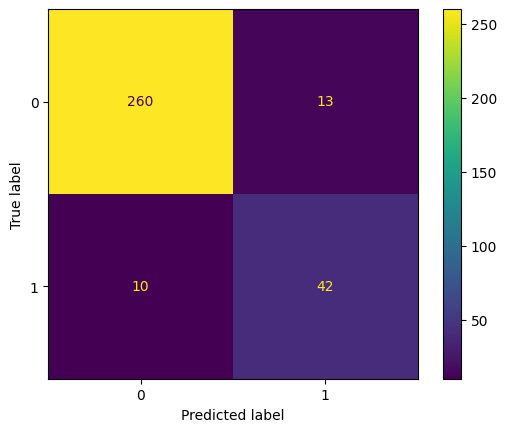

In [35]:
print(classification_report(y_test,y_pred_xg1))
print(ConfusionMatrixDisplay.from_predictions(y_test,y_pred_xg1))

**cheking the value count**

In [36]:
df['Label'].value_counts()

0    884
1    198
Name: Label, dtype: int64

**Balancing the dataset using Oversampling method**

In [37]:
os=SMOTE(random_state=1)
X_os,y_os=os.fit_resample(X,y)

**split dataset into train and test data**

In [38]:
X_train,X_test,y_train,y_test=train_test_split(X_os,y_os,test_size=0.3,random_state=1)

In [39]:
X_train.shape,y_train.shape

((1237, 3044), (1237,))

In [40]:
X_test.shape,y_test.shape


((531, 3044), (531,))

modelcreation:**KNN**

In [41]:
knn=KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=3)

In [42]:
y_pred=knn.predict(X_test)
y_pred

array([1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0,
       1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1,
       0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0,
       1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0,
       1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1,
       1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1,
       0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1,
       0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1,
       1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0,
       1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1,
       0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1,
       0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0,

**performnace measure of KNN**

              precision    recall  f1-score   support

           0       0.96      1.00      0.98       259
           1       1.00      0.96      0.98       272

    accuracy                           0.98       531
   macro avg       0.98      0.98      0.98       531
weighted avg       0.98      0.98      0.98       531



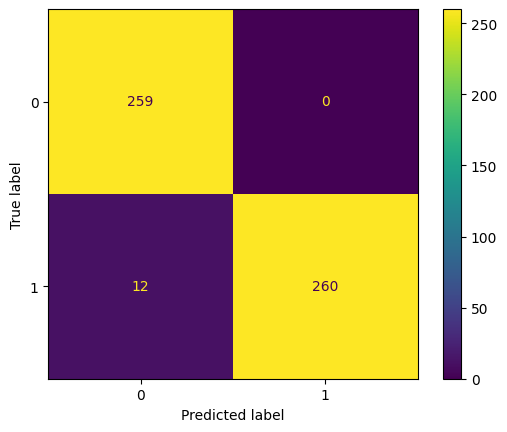

In [43]:
print(classification_report(y_test,y_pred))
print(ConfusionMatrixDisplay.from_predictions(y_test,y_pred))

**model creation:SVC**

In [44]:
sv=SVC(kernel='poly')
sv.fit(X_train,y_train)



SVC(kernel='poly')

In [45]:
y_pred_sv=sv.predict(X_test)
y_pred

array([1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0,
       1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1,
       0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0,
       1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0,
       1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1,
       1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1,
       0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1,
       0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1,
       1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0,
       1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1,
       0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1,
       0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0,

**performance measure of SVC**

              precision    recall  f1-score   support

           0       0.96      1.00      0.98       259
           1       1.00      0.96      0.98       272

    accuracy                           0.98       531
   macro avg       0.98      0.98      0.98       531
weighted avg       0.98      0.98      0.98       531



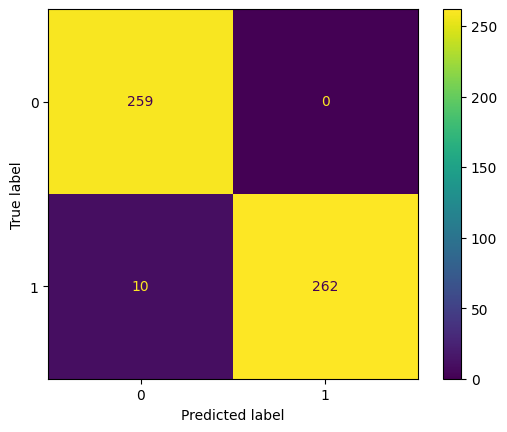

In [46]:
print(classification_report(y_test,y_pred))
print(ConfusionMatrixDisplay.from_predictions(y_test,y_pred_sv))

**model creation of naive bayes**

In [47]:
nb=MultinomialNB()
nb.fit(X_train,y_train)

MultinomialNB()

In [48]:
y_pred_nb=nb.predict(X_test)
y_pred_nb

array([1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0,
       1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1,
       0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0,
       1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0,
       1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1,
       1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1,
       1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1,
       0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1,
       1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0,
       1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1,
       1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1,
       0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1,

**performance measure of naive bayes**

              precision    recall  f1-score   support

           0       1.00      0.94      0.97       259
           1       0.95      1.00      0.97       272

    accuracy                           0.97       531
   macro avg       0.97      0.97      0.97       531
weighted avg       0.97      0.97      0.97       531



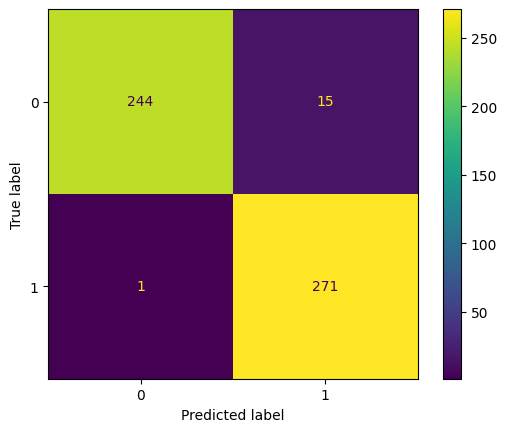

In [49]:
print(classification_report(y_test,y_pred_nb))
print(ConfusionMatrixDisplay.from_predictions(y_test,y_pred_nb))

**`model creation:DecisionTreeClassifier`**

In [50]:
dtc=DecisionTreeClassifier()
dtc.fit(X_train,y_train)

DecisionTreeClassifier()

In [51]:
y_pred_dtc=dtc.predict(X_test)

              precision    recall  f1-score   support

           0       0.94      0.95      0.95       259
           1       0.95      0.94      0.95       272

    accuracy                           0.95       531
   macro avg       0.95      0.95      0.95       531
weighted avg       0.95      0.95      0.95       531



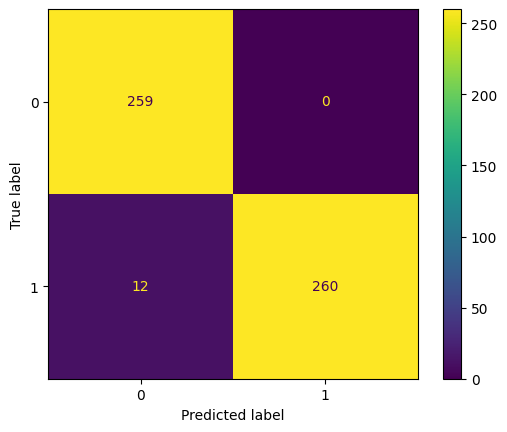

In [52]:
print(classification_report(y_test,y_pred_dtc))
print(ConfusionMatrixDisplay.from_predictions(y_test,y_pred))

**model creation:RandomForestClassifier**

In [53]:
rfc=RandomForestClassifier()
rfc.fit(X_train,y_train)


RandomForestClassifier()

In [54]:
y_pred_rfc=rfc.predict(X_test)
y_pred

array([1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0,
       1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1,
       0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0,
       1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0,
       1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1,
       1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1,
       0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1,
       0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1,
       1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0,
       1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1,
       0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1,
       0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0,

**performance measure of randomforestclassifier**

              precision    recall  f1-score   support

           0       0.96      1.00      0.98       259
           1       1.00      0.96      0.98       272

    accuracy                           0.98       531
   macro avg       0.98      0.98      0.98       531
weighted avg       0.98      0.98      0.98       531



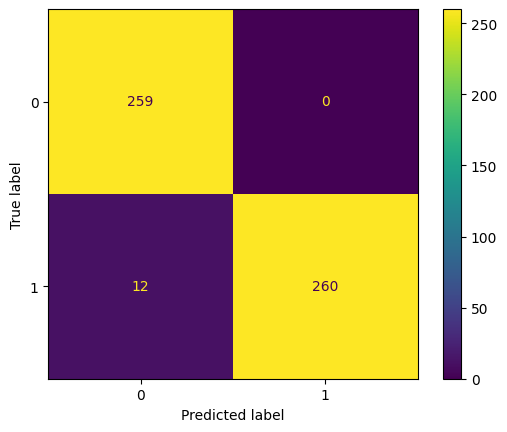

In [55]:
print(classification_report(y_test,y_pred))
print(ConfusionMatrixDisplay.from_predictions(y_test,y_pred))

**model creation:AdaboostClassifer**

In [56]:
abc=AdaBoostClassifier()
abc.fit(X_train,y_train)

AdaBoostClassifier()

In [57]:
y_pred_abc=abc.predict(X_test)
y_pred

array([1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0,
       1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1,
       0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0,
       1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0,
       1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1,
       1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1,
       0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1,
       0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1,
       1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0,
       1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1,
       0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1,
       0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0,

**performance measure of AdaBoostClassifier**

              precision    recall  f1-score   support

           0       0.94      0.97      0.95       259
           1       0.97      0.94      0.96       272

    accuracy                           0.95       531
   macro avg       0.95      0.96      0.95       531
weighted avg       0.96      0.95      0.95       531



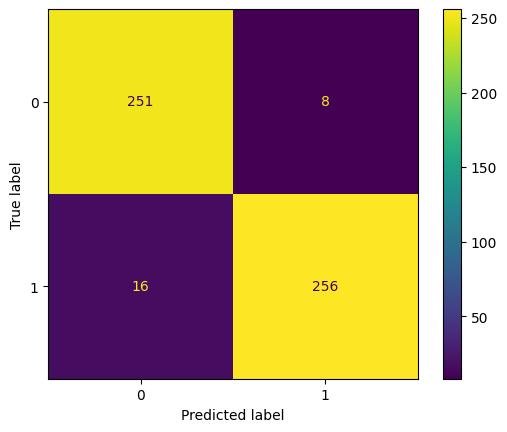

In [58]:
print(classification_report(y_test,y_pred_abc))
print(ConfusionMatrixDisplay.from_predictions(y_test,y_pred_abc))

**model creation:XGBClassifier**

In [59]:
xg=XGBClassifier()
xg.fit(X_train,y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [60]:
y_pred_xg=xg.predict(X_test)
y_pred

array([1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0,
       1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1,
       0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0,
       1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0,
       1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1,
       1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1,
       0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1,
       0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1,
       1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0,
       1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1,
       0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1,
       0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0,

**performance measures of XGBClassifier**

              precision    recall  f1-score   support

           0       0.95      0.98      0.96       259
           1       0.98      0.95      0.96       272

    accuracy                           0.96       531
   macro avg       0.96      0.96      0.96       531
weighted avg       0.96      0.96      0.96       531



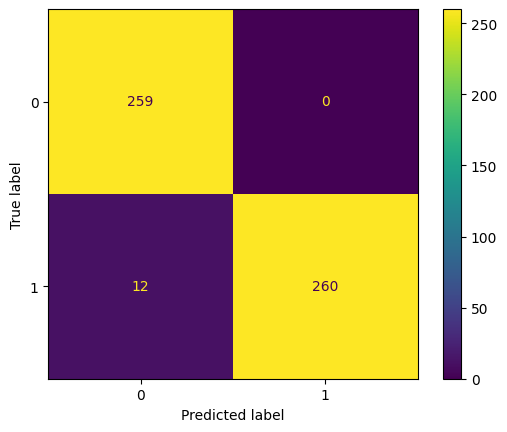

In [61]:
print(classification_report(y_test,y_pred_xg))
print(ConfusionMatrixDisplay.from_predictions(y_test,y_pred))

# RandomForestClassifier with Oversampling give the better result(accuracy=98)

**checking the messge is spam or not**

In [63]:
y_new=rfc.predict(vectorizer.transform(['hello']))
if y_new==0:
  print('its not a spam')
else:
  print('its spam')

its not a spam
